# cluster analysis or cluster density

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

## Example with a unit one on one 

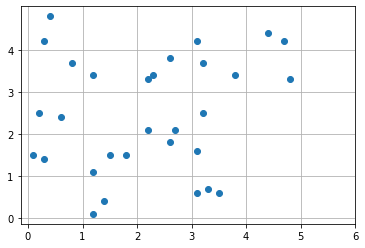

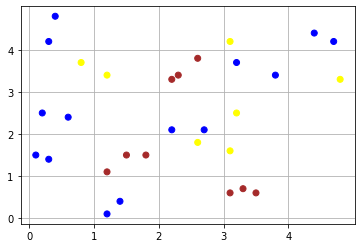

In [2]:
grid = 5
points_number = 30

x = list()
y = list()

# generate points
for n in range(points_number):
    x.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )
    y.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )

plt.scatter(x, y)
plt.xticks(list(range(grid + 2)))
plt.yticks(list(range(5)))
plt.grid()
plt.show()

# points coordinates
points = list(zip(x,y))
points = [list(x) for x in points]

# mapping cells
cells = list()
for x in range(1, grid + 2):
    row = list()
    for y in range(1, grid + 2):
        row.append([y,x, 0])
    cells.append(row)
    
# counting points in cells
for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    cells[y][x][2] += 1
    
# genereting classes based on number of points in cells     
occurrences = set()
for r in cells:
    for c in r:
        occurrences.add(c[2])
        
occurrences = list(occurrences)
classes = np.array_split(occurrences, 3)
classes = [ list(c) for c in classes]

points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}

# assigning points to classes
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
        
# plotting the results
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(5)))
plt.yticks(list(range(5)))
plt.grid()
plt.show()

## Example with a unit bigger than 1

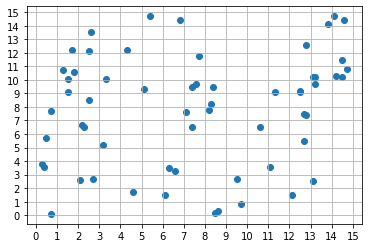

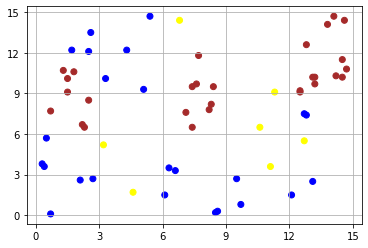

In [15]:
grid = 15
points_number = 60
unit = 3

x = list()
y = list()

# generate points
for n in range(points_number):
    x.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )
    y.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )

plt.scatter(x, y)
plt.xticks(list(range(grid + 1)))
plt.yticks(list(range(grid + 1)))
plt.grid()
plt.show()

# points coordinates
points = list(zip(x,y))
points = [list(x) for x in points]

# mapping cells
resized = math.ceil((grid + 2)/ unit)
resized = list(range(1,resized + 1))
cells = list()
for x in resized:
    row = list()
    for y in resized:
        row.append([y,x,0])
    cells.append(row)

    
# counting points in cells
for p in points:
    x = math.ceil(p[0]/unit) - 1
    y = math.ceil(p[1]/unit) - 1
    cells[y][x][2] += 1
    
    
# genereting classes based on number of points in cells     
occurrences = set()
for r in cells:
    for c in r:
        occurrences.add(c[2])

occurrences = list(occurrences)
classes = np.array_split(occurrences, 3)
classes = [ list(c) for c in classes]
points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}


# assigning points to classes
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]/unit) - 1
    y = math.ceil(p[1]/unit) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
        
# plotting the results
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(0, grid +  unit, unit)))
plt.yticks(list(range(0, grid +  unit, unit)))
plt.grid()
plt.show()